## How do sentiments towards COVID-19 vaccine compare before and after the emergence of the Omicron variant in the Arab world?
### A Twitter comparative sentiment analysis of the pre-Omicron and post-Omicron phases by Arabic users.

### Dependency - The analysis leverages CAMeL Tools
### CAMeL Tools is a suite of Arabic natural language processing tools developed by the CAMeL Lab at New York University Abu Dhabi.
#### pip3 install camel_tools

In [178]:
from camel_tools.utils.normalize          import normalize_alef_maksura_ar
from camel_tools.utils.normalize          import normalize_alef_ar
from camel_tools.utils.normalize          import normalize_teh_marbuta_ar
from camel_tools.utils.normalize          import normalize_unicode
from camel_tools.dialectid                import DialectIdentifier
from camel_tools.sentiment                import SentimentAnalyzer
from camel_tools.utils.dediac             import dediac_ar
from camel_tools.morphology.database      import MorphologyDB
from camel_tools.morphology.analyzer      import Analyzer
from camel_tools.tokenizers.word          import simple_word_tokenize
from camel_tools.disambig.mle             import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer
import os

os.environ["CAMELTOOLS_DATA"] = "~/.camel_tools"


text = 'ﷺ'

sentence = "sentence from tweet"

sent_norm = normalize_unicode(sentence)


# Normalize alef variants to 'ا'
sent_norm = normalize_alef_ar(sentence)

# Normalize alef maksura 'ى' to yeh 'ي'
sent_norm = normalize_alef_maksura_ar(sent_norm)

# Normalize teh marbuta 'ة' to heh 'ه'
sent_norm = normalize_teh_marbuta_ar(sent_norm)


In [179]:
# Load the morphological database.
# The MorphologyDB database is used for analyzing modern Standard Arabic. 
db = MorphologyDB.builtin_db()

analyzer = Analyzer(db)

analyses = analyzer.analyze('موظف')

In [180]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer
import arabicstopwords.arabicstopwords as stp
# The tokenizer expects pre-tokenized text
sentence = simple_word_tokenize("sentence from tweet")

# Load a pretrained disambiguator to use with a tokenizer
mle = MLEDisambiguator.pretrained('calima-msa-r13')

# Without providing additional arguments, the tokenizer will output undiacritized
# morphological tokens for each input word delimited by an underscore.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok')
tokens = tokenizer.tokenize(sentence)

# By specifying `split=True`, the morphological tokens are output as seperate
# strings.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True)
tokens = tokenizer.tokenize(sentence)

# We can output diacritized tokens by setting `diac=True`
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True, diac=True)
tokens = tokenizer.tokenize(sentence)

## Import raw data
### Please see Data_by_day notebook for the method by which the pre and post files were created
#### Tweets using the keywords “لقاحات” or “تطعيم” or “لقاح” or “تطعيمات”  - ”vaccines”, “inoculation”, ”vaccine”, “inoculations” 

In [181]:
import pandas as pd
#Read pre-Omicron tweets from the csv file into a dataframe
raw_tweets_pre = pd.read_csv('tweet_data_by_day.csv', index_col=0)
raw_tweets_pre = raw_tweets_pre[ raw_tweets_pre['text'].str.startswith('RT') == False ]

#Read post-Omicron tweets from the csv file into a dataframe
raw_tweets_post = pd.read_csv('tweet_data_by_day_post_omicron.csv', index_col=0)
raw_tweets_post = raw_tweets_post[ raw_tweets_post['text'].str.startswith('RT') == False ]

### Sentiment Analysis

#### Sentiments by City

In [ ]:
#(optional) use time to see how long it takes to compute sentiments and dialect in your data
from datetime import datetime
#apply dialect identifier and sentiment analyzer then merge them together into one dataframe
did = DialectIdentifier.pretrained()
sa = SentimentAnalyzer.pretrained()

t1 = datetime.now()
#for pre-Omicron tweets
raw_tweets_pre[ 'Sentiment' ] = raw_tweets_pre['text'].apply( lambda x: sa.predict(  [ x ] )[ 0 ] )
raw_tweets_pre[ 'Label' ]     = raw_tweets_pre['text'].apply( lambda x: did.predict( [ x ] )[ 0 ].top )

# Read the CAMeL Tools Dialect Identifier locations document saved on your computer (locations contains labels for cities identified by CAMeL Tools dialect identifier )
loc = pd.read_csv( '/your_directory/locations.csv' );  
raw_tweets_pre = raw_tweets_pre.merge( loc, on ='Label' )
#write the dataframe into a csv file for later use
raw_tweets_pre.to_csv('Raw_tweets_plus_sentiments_pre.csv', index = False )

print(datetime.now() - t1)


1:35:55.283826


In [ ]:
#Repeat for post_Omicron
t1 = datetime.now()

raw_tweets_post[ 'Sentiment' ] = raw_tweets_post['text'].apply( lambda x: sa.predict(  [ x ] )[ 0 ] )
raw_tweets_post[ 'Label' ]     = raw_tweets_post['text'].apply( lambda x: did.predict( [ x ] )[ 0 ].top )

# Read the CAMeL Tools Dialect Identifier label document saved on your computer location
loc = pd.read_csv( '/your_directory/locations.csv' );  
raw_tweets_post = raw_tweets_post.merge( loc, on ='Label' )
#write the dataframe into a csv for later use
raw_tweets_post.to_csv('Raw_tweets_plus_sentiments_post.csv', index = False )

print(datetime.now() - t1)

9:36:22.350924


In [1]:
#Read the saved csv files into a dataframe
df1_tweets = pd.read_csv('Raw_tweets_plus_sentiments_pre.csv');

df2_tweets = pd.read_csv('Raw_tweets_plus_sentiments_post.csv')


### Plot sentiments Pre and Post Omicron

In [8]:
#create a matrix of sentiments by city
import matplotlib.pyplot as plt
from collections import Counter
import pprint as pp
titles = ['sentiment', 'city', 'country', 'region'] 
sentiment_type = ['positive', 'negative', 'neutral'] 

def build_matrix(sentiments):
    matrix = {}

    for row in sentiments.values.astype(str).tolist():
        if not matrix.get(row[0]):
            matrix[ row[0] ] = {}

        if not matrix[ row[0] ].get( row[1] ) :
            matrix[ row[0] ] [ row[1] ] = {}
            matrix[ row[0] ] [ row[1] ] = 1      
        else:
            matrix[ row[0] ] [ row[1] ] += 1      
            
    return(matrix)

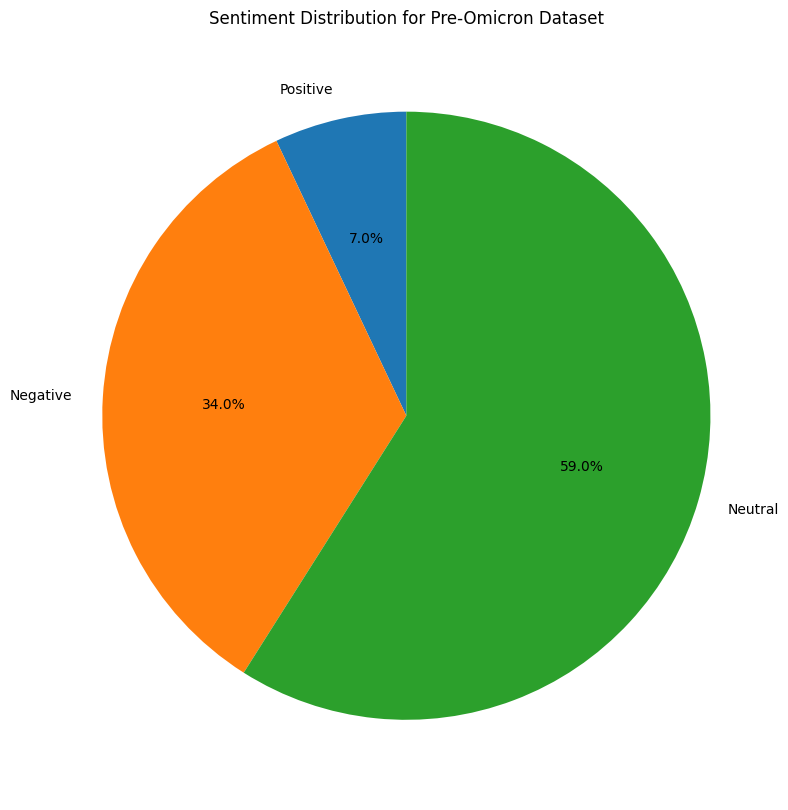

In [9]:
FIGS_PATH='.'
#Read the csv file with sentiments for pre_Omicron
df1_tweets = pd.read_csv('Raw_tweets_plus_sentiments_pre.csv', low_memory=False);
df1_tweets = pd.DataFrame( build_matrix( df1_tweets[['Sentiment','City']] ))

#plot sentiments distriution for pre-Omicron tweets
sentiment_counts = (df1_tweets['positive'].sum(), df1_tweets['negative'].sum(), df1_tweets['neutral'].sum())
labels=["Positive","Negative", "Neutral"]
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90 )
ax1.axis('equal')  
plt.tight_layout()
plt.title('Sentiment Distribution for Pre-Omicron Dataset')
plt.savefig("sentiment1.png")
plt.show()


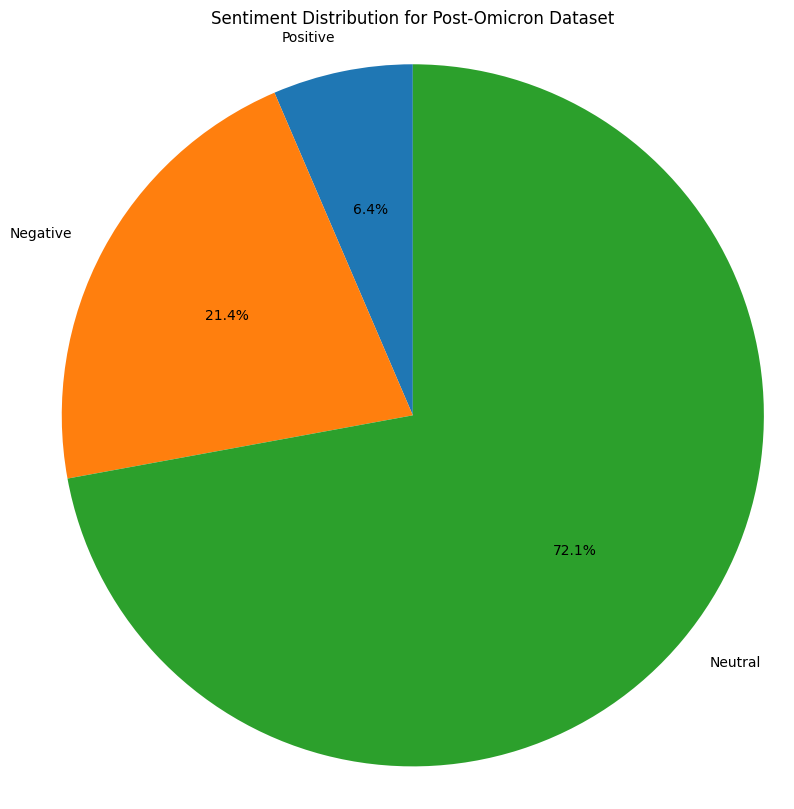

In [10]:
FIGS_PATH='.'
#Read the csv file with sentiments for post_Omicron
df2_tweets = pd.read_csv('Raw_tweets_plus_sentiments_post.csv', low_memory=False);
df2_tweets = pd.DataFrame( build_matrix( df2_tweets[['Sentiment','City']] ))

#plot sentiment distriution for post-Omicron tweets
sentiment_counts = (df2_tweets['positive'].sum(), df2_tweets['negative'].sum(), df2_tweets['neutral'].sum())
labels=["Positive","Negative", "Neutral"]
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90 )
ax1.axis('equal')  
plt.tight_layout()
plt.title('Sentiment Distribution for Post-Omicron Dataset')
plt.savefig("sentiment2.png")
plt.show()

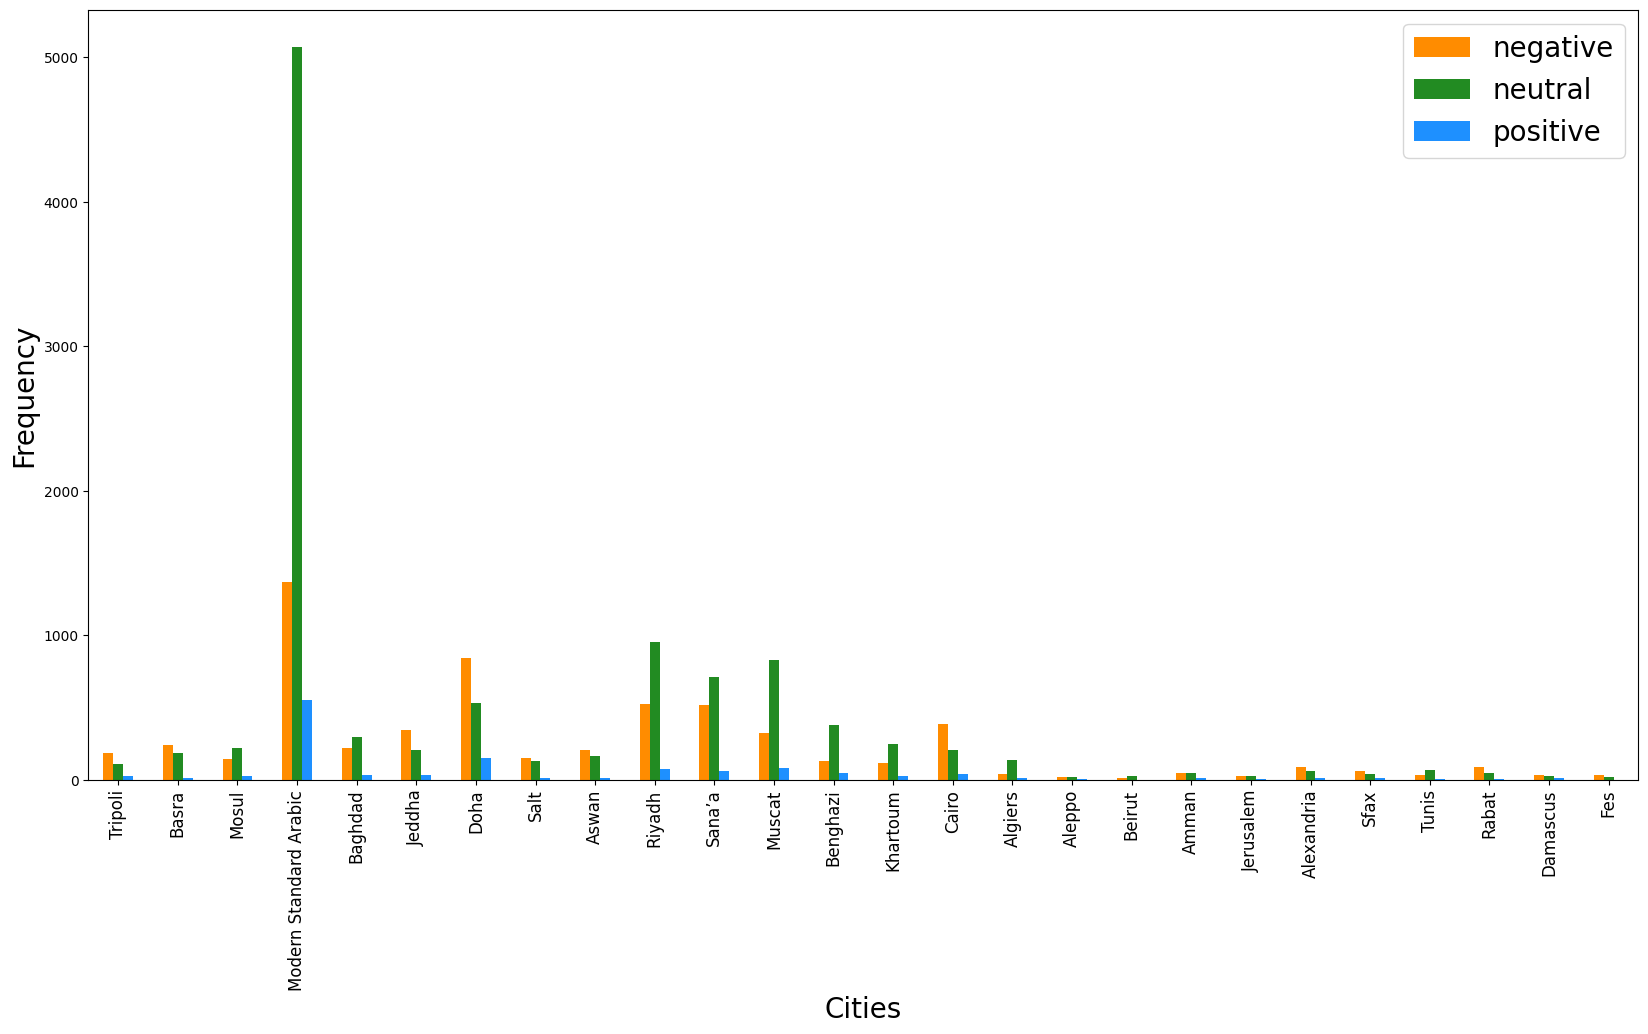

0:00:00.920837


In [11]:
#FIGS_PATH='Insert_Your_Fig_Path'

FIGS_PATH='.'

# Creating a data frame using pandas to compare the occurrence of each sentiment by city for the pre_Omicron corpus
from datetime import datetime

df1_tweets = pd.DataFrame( build_matrix( df1_tweets[['Sentiment','City']] ))

t = datetime.now()
ax= df1_tweets.plot.bar(color = ('#FF8C00','#228B22', '#1E90FF'), figsize=(20, 10))
ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=12)
plt.legend(fontsize = 20)
plt.savefig(FIGS_PATH+"/sentiments_by_city_pre.png")
plt.show()

print(datetime.now() - t)


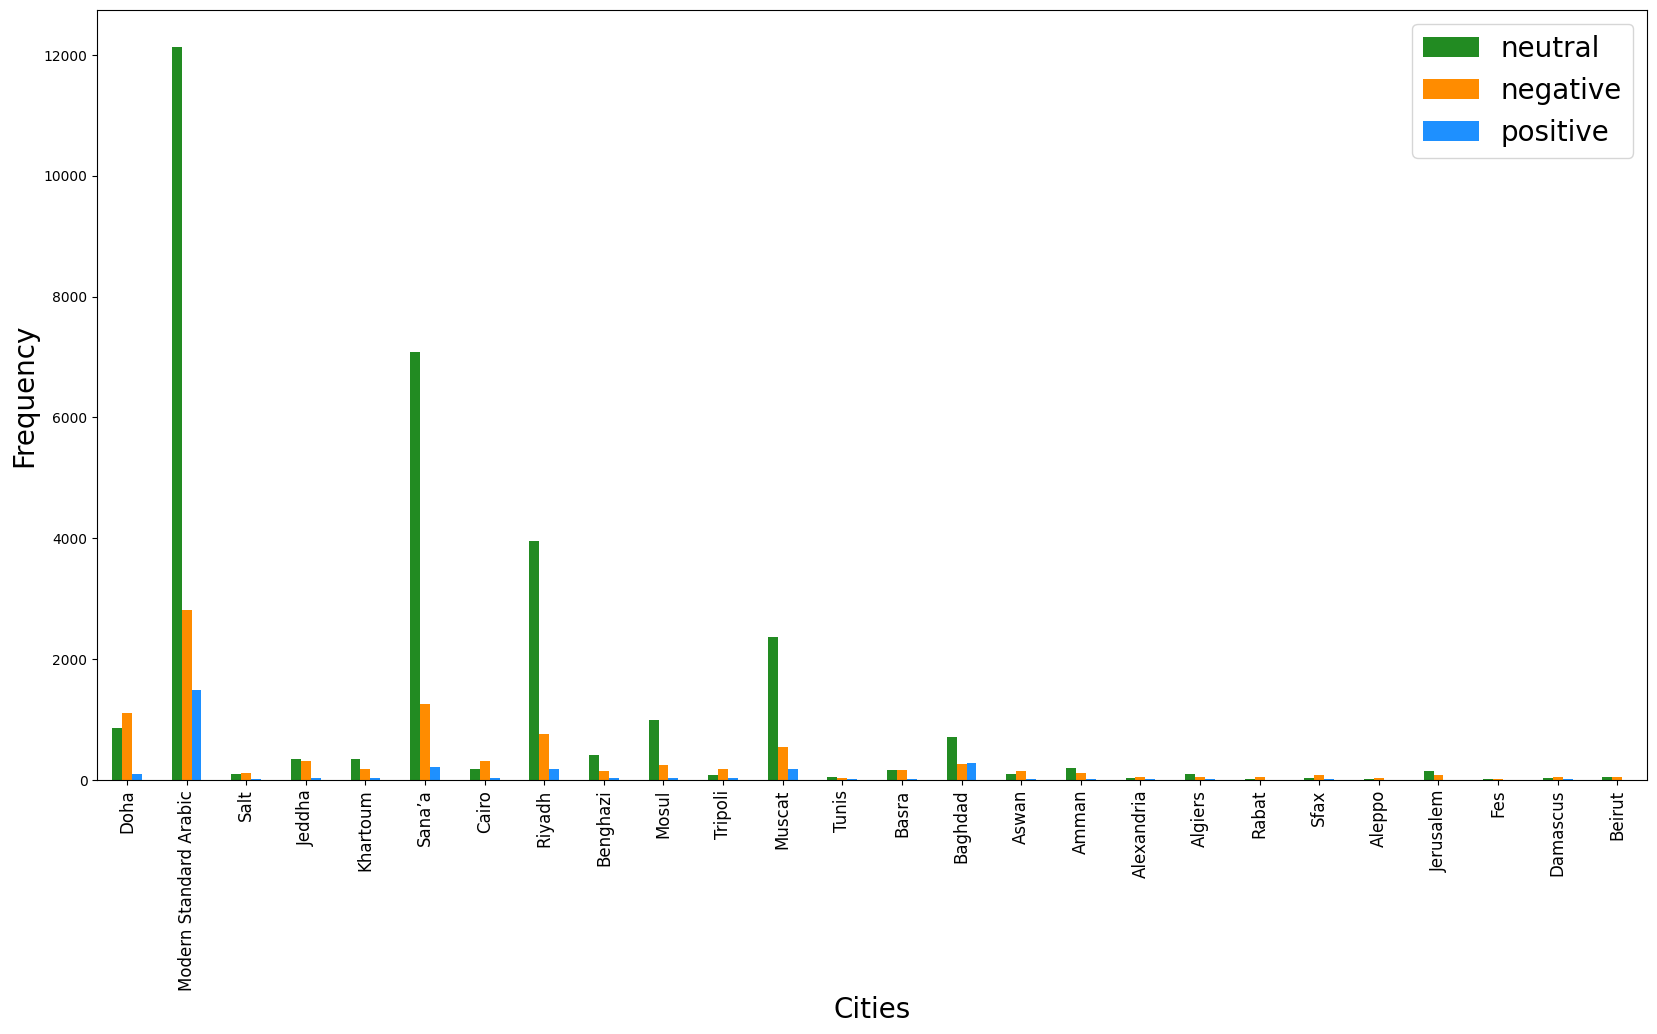

0:00:00.836185


In [14]:
#FIGS_PATH='Insert_Your_Fig_Path'

FIGS_PATH='.'

# Creating a data frame using pandas to compare the occurrence of each sentiment by city for the post_Omicron corpus
from datetime import datetime

df2_tweets = pd.DataFrame( build_matrix( df2_tweets[['Sentiment','City']] ))

t = datetime.now()
ax= df2_tweets.plot.bar(color = ('#228B22','#FF8C00', '#1E90FF'), figsize=(20, 10))
ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=12)
plt.legend(fontsize = 20)
plt.savefig(FIGS_PATH+"/sentiments_by_city_post.png")
plt.show()

print(datetime.now() - t)

### Processing

In [211]:
#add Arabic stopwords from this file
from nltk.stem.isri import ISRIStemmer
import unicodedata as ud
from camel_tools.utils.normalize import normalize_unicode

import arabicstopwords.arabicstopwords as stp
nltk_stopwords = nltk.corpus.stopwords.words('arabic')

my_stopwords =[]
with open('ar_stopwords.txt', 'r') as file:
    #stopwords = file.read()
    for line in (line.rstrip('\n') for line in file):
        my_stopwords.append(line)
#print( my_stopwords)    

In [216]:
from camel_tools.utils.normalize import normalize_unicode
#remove stopwords and all characters that are not arabic letters or # numbers and lemmatize the words
def preprocess_ar(text):
    processedText = []
    
    my_stp = nltk_stopwords  + my_stopwords + stp.stopwords_list() + [ u'كورونا', u'ان', u'انا', u'الان', u'كرو', u'كارو' , u'اللي', u'كرو', u'كارو', u'ملي', u'اي', u'الي', u'الى', u'اذا', u'مضم', u'50'   ]

    # Create Lemmatizer and Stemmer.
    st = ISRIStemmer()

    for t in text:
        t = ''.join(c for c in t if ud.category(c) == 'Lo' or ud.category(c) == 'Nd' or c == ' ')
   
        commentwords = ''
        for word in t.split():
            # Checking if the word is a stopword.

            if word not in my_stp:
                if len(word)>1:
                    # Lemmatizing the word.
                    word = st.suf32(word)
                    commentwords += (word+' ')
        processedText.append(normalize_unicode(commentwords))
    
    return processedText

    

In [217]:
from nltk.stem.isri import ISRIStemmer
import unicodedata as ud
import arabicstopwords.arabicstopwords as stp
#Process the text for pre and post corpuses
processedtext_ar1 = preprocess_ar( df1_tweets.text )
processedtext_ar2 = preprocess_ar( df2_tweets.text )


### Analysis

In [218]:
#Some imports were already imported above, but repeated here to note that they are needed in this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ar_wordcloud import ArabicWordCloud
import nltk

### Visualization
#### Word Cloud

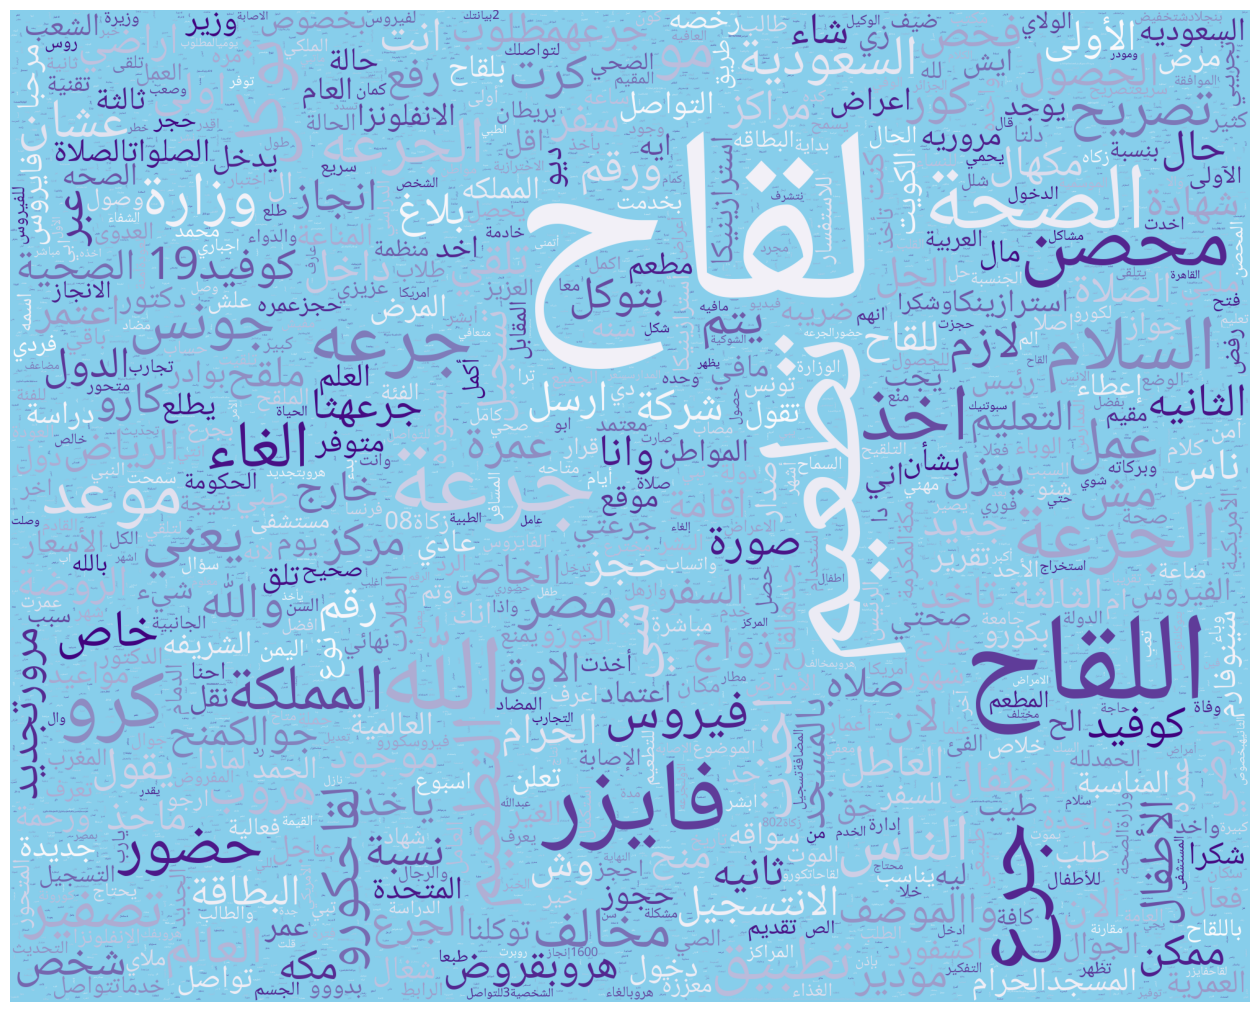

In [194]:
#Add Arabic stopwords to the natural language toolkit
stopwords = nltk.corpus.stopwords.words('arabic')
stopwords.extend(['Arabic stopwords'])
stopwords.append( stopwords)

#plot Arabic wordcloud
awc = ArabicWordCloud(width=2000,height=1600,max_font_size=400,max_words=10000,collocations=False, background_color='skyblue', colormap="Purples")
plt.figure(figsize=(16,16))
#save figure
wc_ar = awc.from_text(u''.join(processedtext_ar1))
plt.axis("off")
plt.imshow(wc_ar)
plt.savefig("WC1.png")



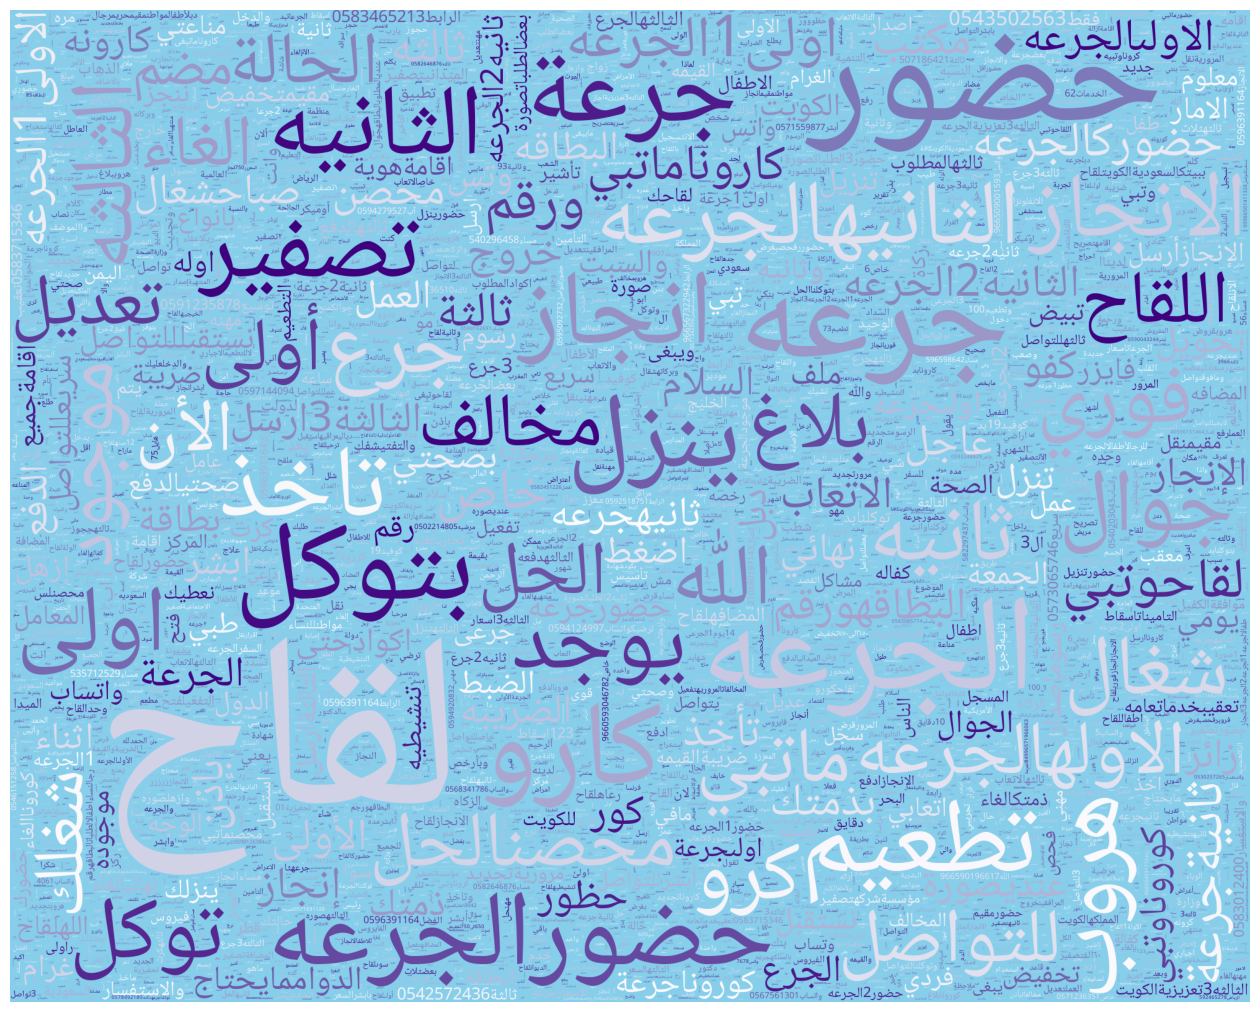

In [196]:
awc = ArabicWordCloud(width=2000,height=1600,max_font_size=400,max_words=10000,collocations=False, background_color='skyblue', colormap="Purples")
plt.figure(figsize=(16,16))
wc_ar = awc.from_text(u''.join(processedtext_ar2))
plt.axis("off")
plt.imshow(wc_ar)
plt.savefig("WC2.png")



### Frequencies

In [219]:
#count the most common words found in tweets 
#Build a dictionary for pre_Omicron
counts_pre = dict()
for i in range(0,len(processedtext_ar1)):
    for word in processedtext_ar1[i].split(' '):
        if  not counts_pre.get(''.join(word)):
            counts_pre[ u''.join(word) ] = 1
        else:
            counts_pre[ u''.join(word) ] += 1
            

{'لقاح': 15031, 'تطعيم': 3217, 'اللقاح': 2102, 'الله': 1520, 'جرعة': 1448, 'فايزر': 1389, 'الصحة': 1168, 'جرع': 1106, 'محصن': 935, 'الجرعة': 913, 'جرعه': 897, 'كرو': 872, 'اخذ': 864, 'السلام': 802, 'موعد': 719, 'توكل': 689, 'التطعيم': 666, 'الجرعه': 588, 'الغاء': 587}


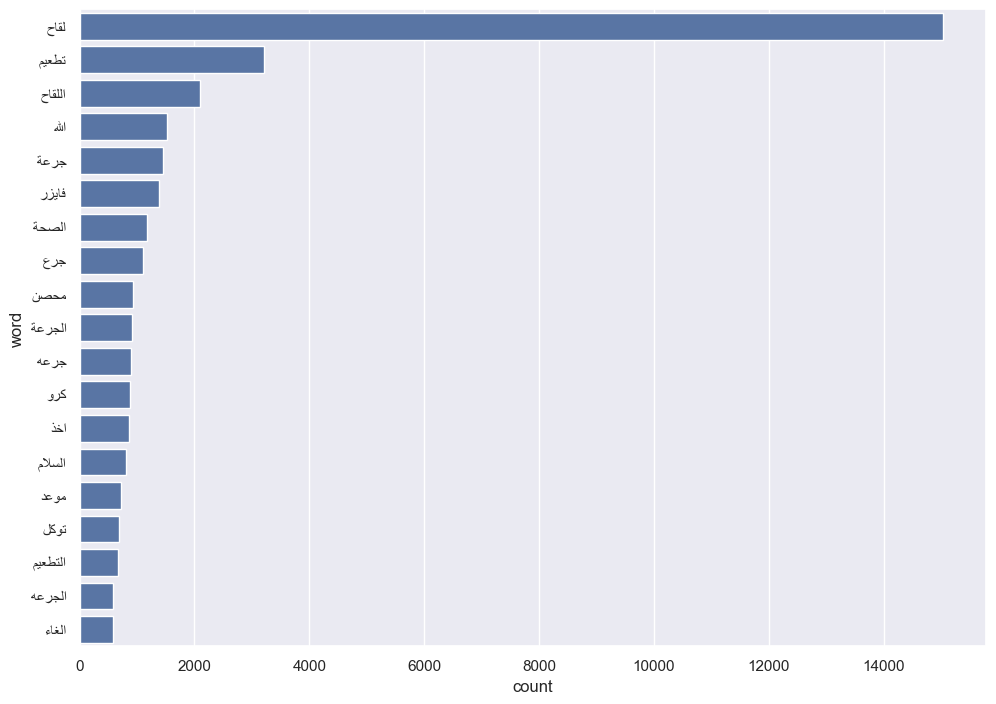

In [220]:
#plot the most common words found in tweets for pre_Omicron
import seaborn as sns
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
#use Arabic reshaper to display Arabic letters correctly from right to left
res_pre=  dict(sorted(counts_pre.items(), key=lambda item: item[1], reverse=True)[:20])
del res_pre['']
print(res_pre)

res2_pre = { get_display(arabic_reshaper.reshape(k)): v for k,v in res_pre.items() }
#put the words in a data frame
df = pd.DataFrame(res2_pre.items(), columns=['word', 'count'])
#plot frequencies
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="count", y="word", data=df)


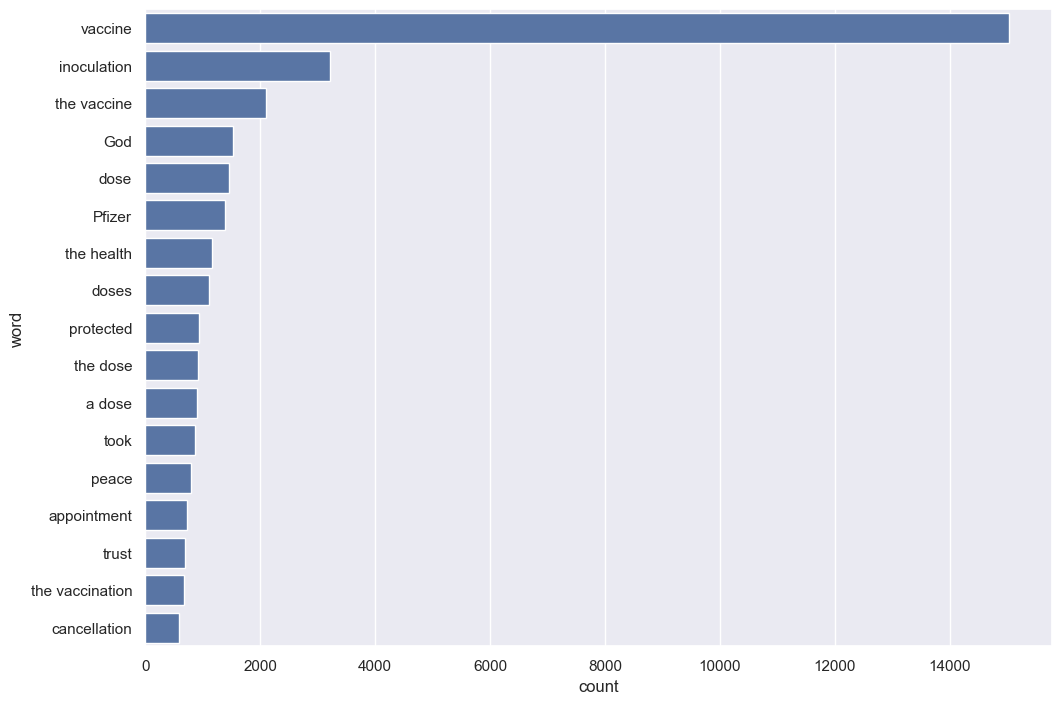

In [228]:
#Most Common Words translated to English for pre-Omicon tweets
#Option 1 Translated manually
#Use this code: 
my_dict1= {u'vaccine':15031, u'inoculation': 3217, u'the vaccine':2102, u'God':1520, u'dose': 1448, u'Pfizer': 1389, u'the health': 1168, u'doses': 1106, u'protected': 935, u'the dose': 913, u'a dose': 897, u'took': 864 , u'peace': 802, u'appointment': 719, u'trust': 689, u'the vaccination':666,  u'cancellation': 587   }
df = pd.DataFrame(my_dict1.items(), columns=['word', 'count'])

# Or Option2 using translator 
#from translate import Translator

#translator = Translator(from_lang="ar", to_lang="en")
#res2_pre=  { translator.translate(k): v for k,v in res_pre.items() }

#df = pd.DataFrame(res2_pre.items(), columns=['word', 'count'])
#plot translated frequencies
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="count", y="word", data=df)



{'لقاح': 39470, 'حضور': 10241, 'جرعه': 7687, 'الجرعه': 7610, 'كارو': 5814, 'بتوكل': 5067, 'ينزل': 4577, 'حضورالجرعه': 4574, 'تطعيم': 4543, 'انجاز': 4532, 'جرعة': 4505, 'تاخذ': 4169, 'الثانيه': 4035, 'تصفير': 3912, 'هروب': 3697, 'اولى': 3484, 'الانجاز': 3374, 'الثانيهالجرعه': 3348, 'يوجد': 3234}


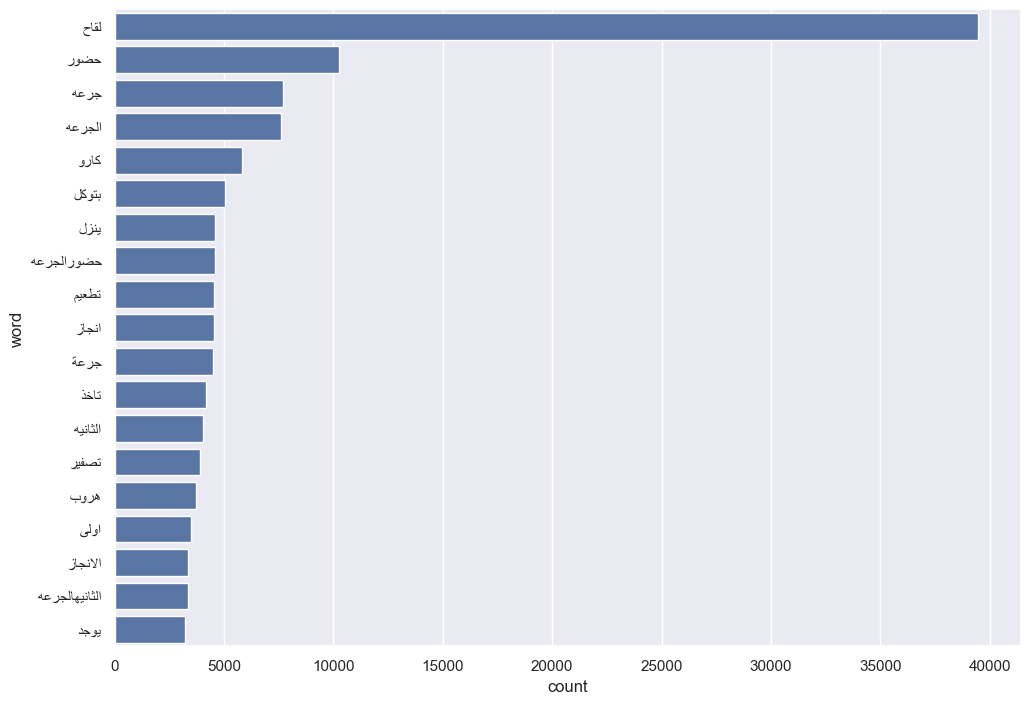

In [221]:
#count and plot the most common words found in tweets for post-Omicron tweets
from collections import Counter

counts_post = dict()
for i in range(0,len(processedtext_ar2)):
    for word in processedtext_ar2[i].split(' ') :

        if  not counts_post.get(''.join(word)):
            counts_post[ ''.join(word) ] = 1
        else:
            counts_post[ ''.join(word) ] += 1

#use Arabic reshaper to display Arabic letters correctly from right to left
res_post=  dict(sorted(counts_post.items(), key=lambda item: item[1], reverse=True)[:20])
del res_post['']
print(res_post)

res2_post = { get_display(arabic_reshaper.reshape(k)): v for k,v in res_post.items() }
#put the words in a data frame
df = pd.DataFrame(res2_post.items(), columns=['word', 'count'])
#plot frequencies
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="count", y="word", data=df)


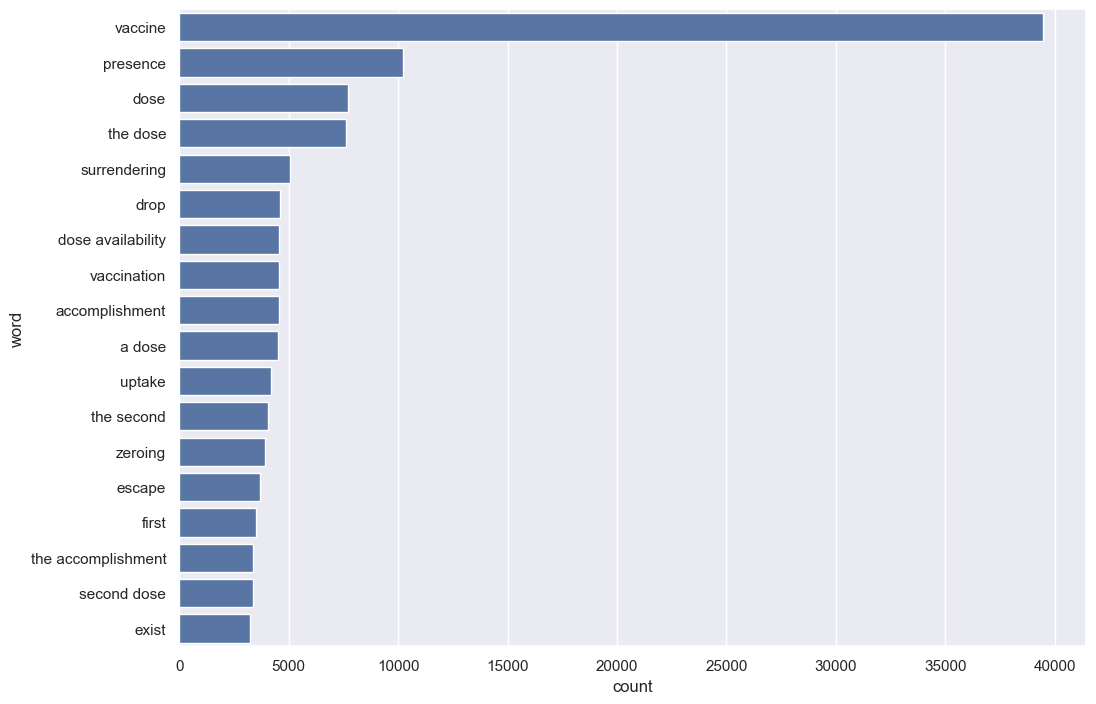

In [206]:
#Most Common Words translated to English for post-Omicon tweets
#Option 1 Translated manually
#Use this code: #
my_dict2= {u'vaccine':39470, u'presence': 10241, u'dose':7687, u'the dose':7610, u'surrendering': 5067, u'drop': 4577 , u'dose availability':4574 , u'vaccination': 4543, u'accomplishment':4532, u' a dose': 4505, u'uptake':4169, u'the second': 4035, u'zeroing':3912, u'escape': 3697, u'first': 3484, u'the accomplishment': 3374, u'second dose':3348, u'exist': 3234  }
df = pd.DataFrame(my_dict2.items(), columns=['word', 'count'])

# Or Option2 using translator 
#Most Common Words translated to English for post-Omicon tweets

#translator = Translator(from_lang="ar", to_lang="en")
#res2_post=  { translator.translate(k): v for k,v in res_post.items() }

#df = pd.DataFrame(res2_post.items(), columns=['word', 'count'])
#plot translated frequencies
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="count", y="word", data=df)


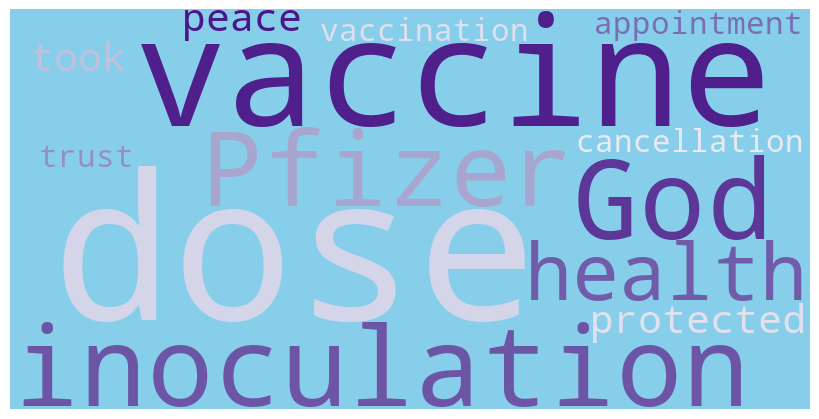

In [224]:
# Create a WordCloud object for translated words for pre_Omicron
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#res2_pre=  { translator.translate(k): v for k,v in res.items() }
wordcloud = WordCloud(
    collocations=False, background_color='skyblue', colormap="Purples",  # Set background color
    width=800,  # Set width of the cloud image
    height=400,  # Set height of the cloud image
    max_words=100,  # Set the maximum number of words to display
).generate(' '.join(my_dict1.keys()))  # Generate the word cloud

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("WC1E.png")
plt.show()

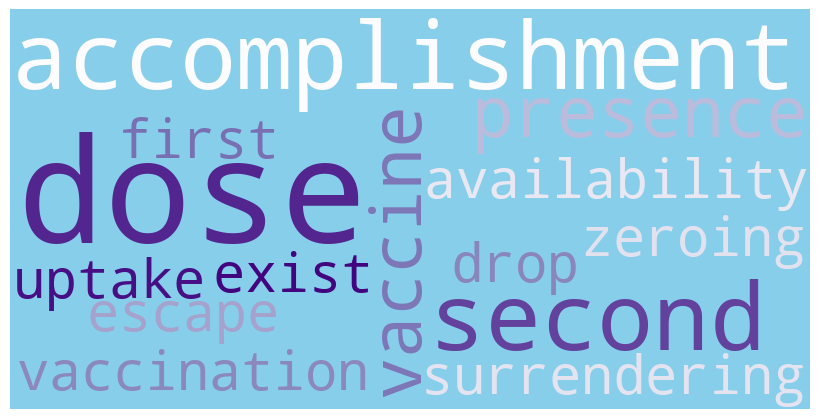

In [222]:
# Create a WordCloud object for translated words for pre_Omicron
#res2_post=  { translator.translate(k): v for k,v in res_post.items() }
my_dict2= {u'vaccine':39470, u'presence': 10241, u'dose':7687, u'the dose':7610, u'surrendering': 5067, u'drop': 4577 , u'dose availability':4574 , u'vaccination': 4543, u'accomplishment':4532, u' a dose': 4505, u'uptake':4169, u'the second': 4035, u'zeroing':3912, u'escape': 3697, u'first': 3484, u'the accomplishment': 3374, u'second dose':3348, u'exist': 3234  }
df = pd.DataFrame(my_dict2.items(), columns=['word', 'count'])
wordcloud = WordCloud(
    collocations=False, background_color='skyblue', colormap="Purples",  # Set background color
    width=800,  # Set width of the cloud image
    height=400,  # Set height of the cloud image
    max_words=100,  # Set the maximum number of words to display
).generate(' '.join(my_dict2.keys()))  # Generate the word cloud

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("WC2E.png")
plt.show()